In [1]:
# Imports 
import numpy as np

import matplotlib.pyplot as plt


In [2]:
# Parameters
n_cities = 20
mutation_rates = [0.1, 0.3, 0.6, 0.9]
population_sizes = [10, 20, 50, 100]

In [3]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,100,n_cities),np.random.randint(0,100,n_cities))]
names_list = np.array(['Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv', 'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'])
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'Berlin': [63, 57],
 'London': [45, 30],
 'Moscow': [70, 4],
 'Barcelona': [23, 46],
 'Rome': [9, 21],
 'Paris': [47, 66],
 'Vienna': [57, 74],
 'Munich': [22, 54],
 'Istanbul': [2, 85],
 'Kyiv': [85, 56],
 'Bucharest': [29, 1],
 'Minsk': [37, 46],
 'Warsaw': [39, 20],
 'Budapest': [15, 89],
 'Milan': [39, 63],
 'Prague': [76, 3],
 'Sofia': [89, 8],
 'Birmingham': [97, 71],
 'Brussels': [72, 63],
 'Amsterdam': [65, 10]}

In [4]:
# First step: Create the first population set
def genesis(city_list, n_population):
    population_set = []
    for i in range(n_population):
        # Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

In [5]:
# Function to compute the fitness of a solution
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities - 1):
        a = city_list[i]
        b = city_list[i + 1]
        total += compute_city_distance_names(a, b, cities_dict)
    return total

In [6]:
def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(len(population_set))

    for i in range(len(population_set)):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list

In [7]:
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = (total_fit/fitnes_list)
    prob_list = prob_list/prob_list.sum()
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])

In [8]:
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[:5]  # Copy the first 5 cities from prog_a

    for city in prog_b:
        if city not in offspring:
            offspring = np.concatenate((offspring, [city]))

    return offspring

In [9]:
def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)

    return new_population_set

In [10]:
def mutate_offspring(offspring):
    for q in range(int(n_cities * mutation_rate)):
        a = np.random.randint(0, n_cities)
        b = np.random.randint(0, n_cities)
        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring

In [11]:
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

KeyboardInterrupt: 

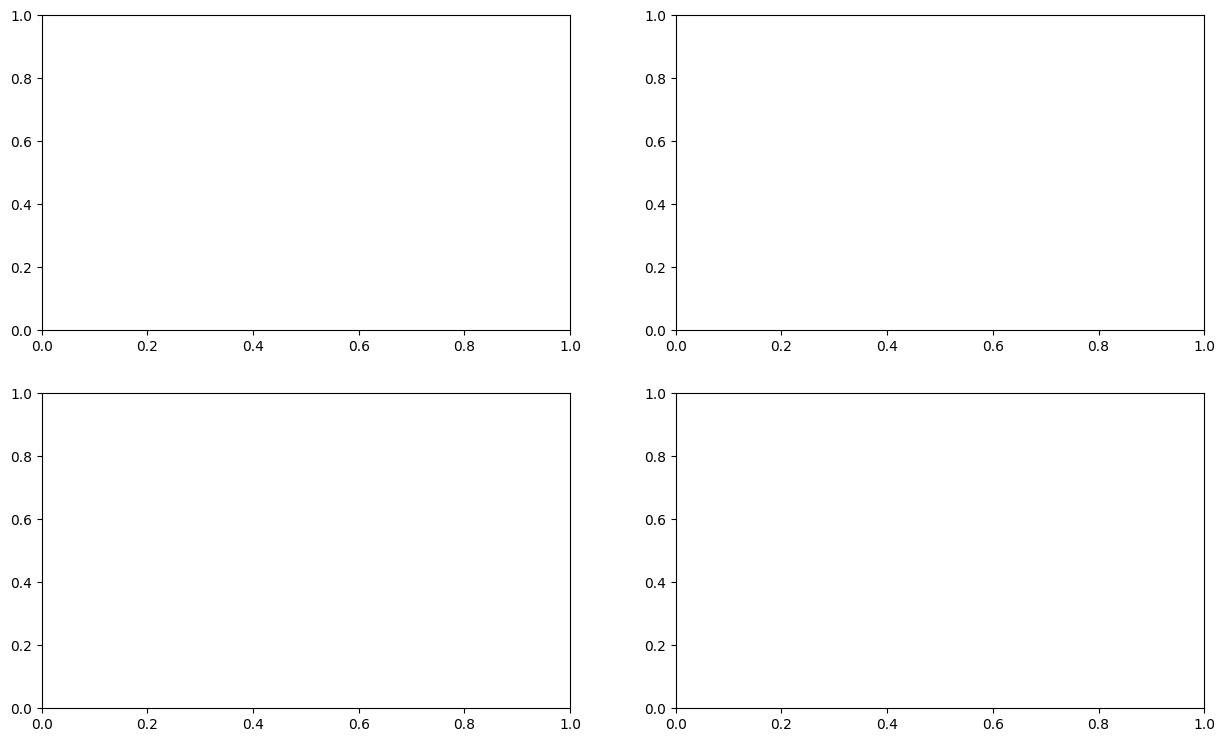

In [13]:
best_fitness_dict = {}

fig, axes = plt.subplots(2, 2, figsize=[15, 9])

for pop_size in [10, 20, 50, 100]: #
    n_population = pop_size
    for mut_rate in [0.9, 0.6, 0.3, 0.1]:
        best_solution = [-1,np.inf,np.array([])]
        mutation_rate = mut_rate
        population_set = genesis(names_list, pop_size)
        fitnes_list = get_all_fitnes(population_set,cities_dict)
        progenitor_list = progenitor_selection(population_set,fitnes_list)
        new_population_set = mate_population(progenitor_list)
        mutated_pop = mutate_population(new_population_set)
        
        test_name = (str(pop_size) + " | " + str(mut_rate))
        best_fitness_dict[test_name] = []

        for i in range(10000): 
            fitnes_list = get_all_fitnes(mutated_pop,cities_dict)

            #Saving the best solution
            if fitnes_list.min() < best_solution[1]:
                best_solution[0] = i
                best_solution[1] = fitnes_list.min()
                best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

            progenitor_list = progenitor_selection(population_set,fitnes_list)
            new_population_set = mate_population(progenitor_list)

            mutated_pop = mutate_population(new_population_set)


            best_fitness_dict[test_name].append(best_solution[1])

j = 0
previous = '10 '
for i in list(best_fitness_dict.keys()):
    if i[:3] != previous:
        j+=1
    axes[(j%2, j//2)].set_title("Population size: " + i[:3])
    previous = i[:3]
    data_Y = best_fitness_dict[i]
    data_X = list(range(10000))
    axes[(j%2, j//2)].plot(data_X, data_Y, label = ("Mutation rate: " + i[-3:]))
    axes[(j%2, j//2)].legend()


plt.show()